In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
import akshare as ak

hk_stock_list_df = ak.stock_hk_spot_em()
print(f"当前港股挂牌总数: {len(hk_stock_list_df)}")
print(hk_stock_list_df.head())
# 
# # 获取腾讯 (00700) 的历史日线数据
# # adjust="": 不复权; "qfq": 前复权; "hfq": 后复权
# hk_hist_df = ak.stock_hk_hist(
#     symbol="09988", 
#     period="daily", 
#     start_date="20000101", 
#     end_date="20260114", 
#     adjust="qfq"
# )
# 
# print(hk_hist_df.head())
# 
# stock_hk_scale_comparison_em_df = ak.stock_hk_scale_comparison_em(symbol="09988")
# stock_hk_scale_comparison_em_df

  0%|          | 0/45 [00:00<?, ?it/s]

当前港股挂牌总数: 4597
   序号     代码              名称    最新价    涨跌额    涨跌幅     今开     最高     最低     昨收  \
0   1  01546            德莱建业  0.355  0.163  84.90  0.220  0.445  0.220  0.192   
1   2  01875          东曜药业-B  4.190  1.690  67.60  3.970  4.450  3.870  2.500   
2   3  08621  METROPOLIS CAP  0.041  0.016  64.00  0.027  0.043  0.027  0.025   
3   4  01939            上善黄金  1.230  0.430  53.75  0.800  1.280  0.800  0.800   
4   5  01903    JBB BUILDERS  2.830  0.930  48.95  1.900  2.830  1.900  1.900   

          成交量          成交额  
0  27830000.0    9992395.0  
1  42263000.0  172167070.0  
2   9576000.0     364240.0  
3  50251500.0   54904762.0  
4   9132000.0   22206780.0  


In [30]:
def akshare_to_yfinance(tickers):
    """
    将 AkShare 的 5 位港股代码转换为 yfinance 的 .HK 格式
    :param tickers: 列表或数组, 例如 ['00700', '09988']
    :return: 转换后的列表
    """
    # 逻辑：取字符串最后 4 位并加上 .HK
    return [f"{str(t)[-4:]}.HK" for t in tickers]

ak_codes = hk_stock_list_df['代码'].values
yf_codes = akshare_to_yfinance(ak_codes)

In [43]:
# # 获取港股财务报表 (以腾讯 00700 为例)
# # symbol: 5位代码; indicator: "总利润表", "资产负债表", "现金流量表"
# 
# ak.stock_hk_financial_indicator_em(symbol="09988")

# Create a dictionary or list to store data
import time

all_data = {}

# For demonstration, we'll just pull the first 5 stocks
# Downloading all 2,500+ stocks will take time!
for ticker in ak_codes[:5]:
    try:
        print(f"Downloading {ticker}...")

        # adjust="qfq" means 'Front-Adjusted' (standard for analysis)
        df = ak.stock_hk_hist(
            symbol=ticker, 
            period="daily", 
            start_date="20000101", 
            end_date="20260101", 
            adjust="qfq"
        )

        # Store the data
        all_data[ticker] = df

        # Pause briefly to avoid being blocked by the data provider
        time.sleep(0.25) 

    except Exception as e:
        print(f"Could not download {ticker}: {e}")


       公司名称                      英文名称                      注册地  \
0  腾讯控股有限公司  Tencent Holdings Limited  Cayman Islands 开曼群岛（英属）   

                                                注册地址      公司成立日期  所属行业  董事长  \
0  Cricket Square, Hutchins Drive, P.O.Box 2681, ...  1999-11-23  软件服务  马化腾   

  公司秘书    员工人数                                      办公地址             公司网址  \
0  刘淑仪  115076  香港湾仔皇后大道东1号太古广场三座29楼;深圳市南山区海天二路33号腾讯滨海大厦  www.tencent.com   

           E-MAIL    年结日                                联系电话          核数师  \
0  ir@tencent.com  12-31  +852 3148-5100,+86 (755) 8601-3388  罗兵咸永道会计师事务所   

               传真                                               公司介绍  
0  +852 2520-1148      腾讯控股有限公司是一家世界领先的互联网科技公司,用创新的产品和服务提升全球各地人们的...  


In [47]:
# Example: Accessing Tencent data
# print(all_data['00700'].head())

company_info = {}

for code in ak_codes[:10]:
    company_profile = ak.stock_hk_security_profile_em(code)
    company_info[code] = company_profile

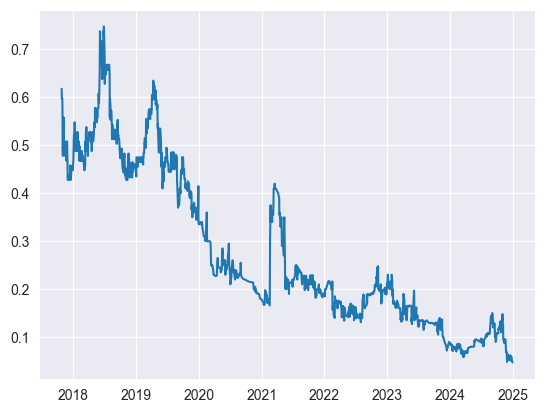

In [42]:
plt.plot(pd.to_datetime(all_data['01546']['日期']), all_data['01546']['收盘'])

In [62]:
# 将 4145 个代码分成每组 200 个
chunk_size = 200
ticker_chunks = [yf_codes[i:i + chunk_size] for i in range(0, len(yf_codes), chunk_size)]

all_results = []

for i, chunk in enumerate(ticker_chunks):
    print(f"正在下载第 {i+1}/{len(ticker_chunks)} 组数据...")
    try:
        # 下载这一组
        data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
        all_results.append(data)
        # 适当休眠，防止被 Yahoo 封锁 IP
        time.sleep(2) 
    except Exception as e:
        print(f"第 {i+1} 组下载失败: {e}")

# 合并所有数据
final_df = pd.concat(all_results, axis=1)

# 假设 final_df 是你下载好的 4000 只股票数据
final_df.to_csv('hk_stocks_data.csv')

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       1%                       ]  2 of 200 completed

正在下载第 1/23 组数据...


[*********************100%***********************]  200 of 200 completed
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 2/23 组数据...


[*********************100%***********************]  199 of 199 completed
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 3/23 组数据...


[*********************100%***********************]  198 of 198 completed
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 4/23 组数据...


[*********************100%***********************]  197 of 197 completed

2 Failed downloads:
['3168.HK', '2099.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


正在下载第 5/23 组数据...


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[*********************100%***********************]  195 of 195 completed

10 Failed downloads:
['3410.HK', '3483.HK', '2839.HK', '3606.HK', '0001.HK', '9829.HK', '0066.HK', '2600.HK', '2810.HK', '3437.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 6/23 组数据...


[*********************100%***********************]  198 of 198 completed

7 Failed downloads:
['0810.HK', '3421.HK', '9011.HK', '8096.HK', '1720.HK', '0844.HK', '1731.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 7/23 组数据...


[*********************100%***********************]  200 of 200 completed

1 Failed download:
['7001.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       1%                       ]  2 of 200 completed

正在下载第 8/23 组数据...


[*********************100%***********************]  200 of 200 completed

1 Failed download:
['9416.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


正在下载第 9/23 组数据...


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[*********************100%***********************]  200 of 200 completed

2 Failed downloads:
['4273.HK', '4286.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       1%                       ]  2 of 195 completed

正在下载第 10/23 组数据...


[*********************100%***********************]  195 of 195 completed

1 Failed download:
['4701.HK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2026-01-15)')


正在下载第 11/23 组数据...


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[*********************100%***********************]  196 of 196 completed


正在下载第 12/23 组数据...


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[*********************100%***********************]  199 of 199 completed


正在下载第 13/23 组数据...


/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[*********************100%***********************]  200 of 200 completed
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 14/23 组数据...


[*********************100%***********************]  199 of 199 completed
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 15/23 组数据...


[*********************100%***********************]  200 of 200 completed
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 16/23 组数据...


[*********************100%***********************]  200 of 200 completed

178 Failed downloads:
['5099.HK', '5045.HK', '5039.HK', '5024.HK', '5052.HK', '5007.HK', '5094.HK', '5077.HK', '5048.HK', '4572.HK', '5059.HK', '4592.HK', '5018.HK', '4573.HK', '5063.HK', '4558.HK', '5021.HK', '4599.HK', '4578.HK', '5097.HK', '5038.HK', '4557.HK', '4555.HK', '5037.HK', '4560.HK', '4597.HK', '6022.HK', '5904.HK', '5035.HK', '9007.HK', '4596.HK', '5011.HK', '5098.HK', '5049.HK', '5031.HK', '4559.HK', '5072.HK', '5034.HK', '5002.HK', '5008.HK', '4593.HK', '4582.HK', '4569.HK', '4553.HK', '5067.HK', '5060.HK', '4575.HK', '5000.HK', '9015.HK', '5068.HK', '4583.HK', '6002.HK', '5001.HK', '5075.HK', '5051.HK', '5074.HK', '5078.HK', '5033.HK', '5041.HK', '4563.HK', '5044.HK', '5019.HK', '5070.HK', '5040.HK', '4556.HK', '5071.HK', '5003.HK', '4567.HK', '4565.HK', '4588.HK', '6019.HK', '5905.HK', '5096.HK', '4589.HK', '4584.HK', '4587.HK', '4577.HK', '4586.HK', '5066.HK', '5083.HK', '4562.HK', '5073.HK', '

正在下载第 17/23 组数据...


[*********************100%***********************]  200 of 200 completed

127 Failed downloads:
['4433.HK', '4474.HK', '4531.HK', '4487.HK', '4507.HK', '4500.HK', '4548.HK', '4449.HK', '4513.HK', '4529.HK', '4410.HK', '4503.HK', '4480.HK', '4504.HK', '4442.HK', '4455.HK', '4509.HK', '4447.HK', '4429.HK', '4479.HK', '4488.HK', '4463.HK', '4546.HK', '4492.HK', '4510.HK', '4491.HK', '4472.HK', '0890.HK', '4527.HK', '4439.HK', '4502.HK', '4485.HK', '4437.HK', '4535.HK', '4496.HK', '4490.HK', '4475.HK', '4443.HK', '4540.HK', '4515.HK', '4512.HK', '4415.HK', '4484.HK', '4542.HK', '4448.HK', '4508.HK', '4460.HK', '4533.HK', '4526.HK', '4458.HK', '4549.HK', '4543.HK', '4518.HK', '4497.HK', '4499.HK', '4452.HK', '0870.HK', '4511.HK', '4516.HK', '4545.HK', '4464.HK', '4453.HK', '4486.HK', '4435.HK', '4536.HK', '4473.HK', '4468.HK', '4522.HK', '4451.HK', '4469.HK', '4489.HK', '4520.HK', '4428.HK', '4470.HK', '4538.HK', '4534.HK', '4440.HK', '0930.HK', '4457.HK', '4483.HK', '4477.HK', '4537.HK', '

正在下载第 18/23 组数据...


[*********************100%***********************]  200 of 200 completed

32 Failed downloads:
['0024.HK', '0534.HK', '0378.HK', '0651.HK', '0644.HK', '0671.HK', '0678.HK', '0614.HK', '0634.HK', '0402.HK', '0198.HK', '0359.HK', '0015.HK', '0221.HK', '0226.HK', '0260.HK', '0577.HK', '0454.HK', '0192.HK', '0541.HK', '0056.HK', '0443.HK', '0141.HK', '0342.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
['0562.HK', '0649.HK', '0664.HK', '0504.HK', '0049.HK', '0350.HK', '0349.HK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2026-01-15)')
['0278.HK']: YFTzMissingError('possibly delisted; no timezone found')
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_39053/3983154911.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(chunk, start='2000-01-01', threads=False, progress=True)['Close']
[                       0%                       ]

正在下载第 19/23 组数据...


[*********************100%***********************]  200 of 200 completed

140 Failed downloads:
['5951.HK', '5997.HK', '5947.HK', '5980.HK', '5982.HK', '5996.HK', '6003.HK', '5944.HK', '5963.HK', '5920.HK', '5999.HK', '5959.HK', '6013.HK', '5919.HK', '5910.HK', '5993.HK', '5995.HK', '5922.HK', '5968.HK', '5938.HK', '5888.HK', '5895.HK', '5892.HK', '5943.HK', '6002.HK', '5930.HK', '5985.HK', '5935.HK', '6025.HK', '5955.HK', '5921.HK', '5990.HK', '5992.HK', '5902.HK', '5961.HK', '5918.HK', '5942.HK', '6005.HK', '5893.HK', '5932.HK', '5887.HK', '5967.HK', '5898.HK', '5953.HK', '6010.HK', '5962.HK', '6006.HK', '5969.HK', '5912.HK', '5889.HK', '5946.HK', '6001.HK', '6024.HK', '5907.HK', '5971.HK', '6014.HK', '5927.HK', '6004.HK', '5934.HK', '6751.HK', '6007.HK', '5987.HK', '5952.HK', '5964.HK', '6029.HK', '5903.HK', '5896.HK', '6016.HK', '6009.HK', '6012.HK', '5911.HK', '6000.HK', '6028.HK', '5989.HK', '6018.HK', '5899.HK', '5891.HK', '5928.HK', '6017.HK', '5937.HK', '5998.HK', '5978.HK', '

正在下载第 20/23 组数据...


[*********************100%***********************]  200 of 200 completed

200 Failed downloads:
['5670.HK', '5606.HK', '5693.HK', '5713.HK', '5726.HK', '5591.HK', '5741.HK', '5611.HK', '5667.HK', '5595.HK', '5766.HK', '5737.HK', '5660.HK', '5651.HK', '5858.HK', '5762.HK', '5615.HK', '5820.HK', '5598.HK', '5560.HK', '5783.HK', '5777.HK', '5634.HK', '5692.HK', '5582.HK', '5801.HK', '5688.HK', '5671.HK', '5512.HK', '5872.HK', '5833.HK', '5813.HK', '5761.HK', '5679.HK', '5503.HK', '5800.HK', '5685.HK', '5680.HK', '5778.HK', '5599.HK', '5857.HK', '5612.HK', '5658.HK', '5818.HK', '5622.HK', '5638.HK', '5877.HK', '5578.HK', '5632.HK', '5870.HK', '5756.HK', '5735.HK', '5569.HK', '5666.HK', '5564.HK', '5676.HK', '5603.HK', '5513.HK', '5786.HK', '5846.HK', '5694.HK', '5784.HK', '5805.HK', '5687.HK', '5702.HK', '5662.HK', '5689.HK', '5835.HK', '5665.HK', '5691.HK', '5534.HK', '5769.HK', '5792.HK', '5824.HK', '5779.HK', '5637.HK', '5752.HK', '5575.HK', '5806.HK', '5563.HK', '5714.HK', '5641.HK', '

正在下载第 21/23 组数据...


[*********************100%***********************]  200 of 200 completed

200 Failed downloads:
['5486.HK', '5168.HK', '5198.HK', '5176.HK', '5170.HK', '5496.HK', '5481.HK', '5455.HK', '5173.HK', '5186.HK', '5492.HK', '5165.HK', '5484.HK', '5465.HK', '5495.HK', '5487.HK', '5185.HK', '5467.HK', '5469.HK', '5167.HK', '5161.HK', '5181.HK', '5494.HK', '5462.HK', '5180.HK', '5466.HK', '5471.HK', '5158.HK', '5491.HK', '5193.HK', '5192.HK', '5473.HK', '5174.HK', '5479.HK', '5197.HK', '5474.HK', '5497.HK', '5480.HK', '5187.HK', '5490.HK', '5156.HK', '5178.HK', '5172.HK', '5460.HK', '5169.HK', '5457.HK', '5488.HK', '5196.HK', '5155.HK', '5470.HK', '5464.HK', '5171.HK', '5188.HK', '5472.HK', '5162.HK', '5493.HK', '5489.HK', '5189.HK', '5190.HK', '5477.HK', '5157.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
['5337.HK', '5218.HK', '5175.HK', '5369.HK', '5440.HK', '5308.HK', '5396.HK', '5296.HK', '5206.HK', '5407.HK', '5446.HK', '5230.HK', '5184.HK', '5239.HK', '535

正在下载第 22/23 组数据...


[*********************100%***********************]  200 of 200 completed

200 Failed downloads:
['4501.HK', '4621.HK', '4531.HK', '5129.HK', '4507.HK', '4321.HK', '5024.HK', '4548.HK', '4478.HK', '5094.HK', '4529.HK', '5048.HK', '5138.HK', '4446.HK', '5059.HK', '5135.HK', '5021.HK', '4578.HK', '5038.HK', '4555.HK', '4557.HK', '4504.HK', '4442.HK', '4413.HK', '4596.HK', '5031.HK', '5131.HK', '4488.HK', '4546.HK', '4492.HK', '5034.HK', '5002.HK', '4472.HK', '4582.HK', '4569.HK', '5067.HK', '4575.HK', '4439.HK', '5000.HK', '4502.HK', '4310.HK', '4319.HK', '5144.HK', '4535.HK', '4583.HK', '5001.HK', '5075.HK', '4515.HK', '4512.HK', '5033.HK', '5041.HK', '4563.HK', '4432.HK', '5140.HK', '5125.HK', '4415.HK', '4542.HK', '4424.HK', '5003.HK', '4567.HK', '4547.HK', '4508.HK', '4314.HK', '4588.HK', '4526.HK', '4497.HK', '4543.HK', '4518.HK', '5122.HK', '4584.HK', '4326.HK', '4318.HK', '5146.HK', '4577.HK', '4586.HK', '4324.HK', '5132.HK', '4406.HK', '4516.HK', '5147.HK', '4545.HK', '4423.HK', '

正在下载第 23/23 组数据...


[*********************100%***********************]  197 of 197 completed

89 Failed downloads:
['4235.HK', '4012.HK', '4048.HK', '4018.HK', '4233.HK', '2568.HK', '2527.HK', '4230.HK', '4024.HK', '4054.HK', '1687.HK', '4030.HK', '4232.HK', '4036.HK', '3588.HK', '2553.HK', '4042.HK', '4227.HK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2026-01-15)')
['4267.HK', '0758.HK', '0925.HK', '4268.HK', '2292.HK', '1989.HK', '2615.HK', '1665.HK', '1015.HK', '4106.HK', '4261.HK', '1016.HK', '1992.HK', '4099.HK', '4236.HK', '1558.HK', '0531.HK', '4241.HK', '4243.HK', '4100.HK', '4269.HK', '1381.HK', '4260.HK', '4249.HK', '4107.HK', '0292.HK', '2115.HK', '1018.HK', '4258.HK', '0592.HK', '4262.HK', '0226.HK', '1076.HK', '0260.HK', '1329.HK', '1017.HK', '1297.HK', '2148.HK', '2346.HK', '2217.HK', '3326.HK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
['1730.HK', '0872.HK', '0278.HK', '4248.HK', '0668.HK', '1194.HK', '4270.HK', '1839.HK

In [63]:
df = pd.read_csv('hk_stocks_data.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.columns

Index(['0017.HK', '0019.HK', '0036.HK', '0117.HK', '0132.HK', '0185.HK',
       '0189.HK', '0204.HK', '0217.HK', '0235.HK',
       ...
       '4258.HK', '4260.HK', '4261.HK', '4262.HK', '4264.HK', '4267.HK',
       '4268.HK', '4269.HK', '4270.HK', '4271.HK'],
      dtype='object', length=4573)

In [64]:
# Returns a boolean Series: True if all values in column are NaN
empty_cols_boolean = df.isna().all()

# Filter to get just the names
empty_columns = empty_cols_boolean[empty_cols_boolean].index.tolist()
print(f'Empty columns: {empty_columns}')

Empty columns: ['2099.HK', '3168.HK', '0001.HK', '0066.HK', '2600.HK', '2810.HK', '2839.HK', '3410.HK', '3437.HK.1', '3483.HK.1', '3606.HK', '9829.HK', '0810.HK', '0844.HK', '1720.HK', '1731.HK', '3421.HK', '8096.HK', '9011.HK', '7001.HK', '9416.HK', '4273.HK', '4286.HK', '4701.HK', '4550.HK', '4551.HK', '4552.HK', '4553.HK', '4554.HK', '4555.HK', '4556.HK', '4557.HK', '4558.HK', '4559.HK', '4560.HK', '4561.HK', '4562.HK', '4563.HK', '4564.HK', '4565.HK', '4566.HK', '4567.HK', '4568.HK', '4569.HK', '4570.HK', '4571.HK', '4572.HK', '4573.HK', '4574.HK', '4575.HK', '4576.HK', '4577.HK', '4578.HK', '4580.HK', '4581.HK', '4582.HK', '4583.HK', '4584.HK', '4585.HK', '4586.HK', '4587.HK', '4588.HK', '4589.HK', '4590.HK', '4591.HK', '4592.HK', '4593.HK', '4594.HK', '4596.HK', '4597.HK', '4598.HK', '4599.HK', '5000.HK', '5001.HK', '5002.HK', '5003.HK', '5004.HK', '5005.HK', '5006.HK', '5007.HK', '5008.HK', '5009.HK', '5010.HK', '5011.HK', '5012.HK', '5013.HK', '5014.HK', '5015.HK', '5017.HK', '

In [65]:
df = df.drop(columns=empty_columns)
df.columns

Index(['0017.HK', '0019.HK', '0036.HK', '0117.HK', '0132.HK', '0185.HK',
       '0189.HK', '0204.HK', '0217.HK', '0235.HK',
       ...
       '2708.HK', '2768.HK', '3021.HK', '3130.HK.1', '3331.HK', '3333.HK',
       '3405.HK', '3611.HK', '3708.HK', '3903.HK'],
      dtype='object', length=3383)